# Natural Language Processing with Embeddig Layer

In [1]:
from IPython.display import Image

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd

<IPython.core.display.Javascript object>

In [3]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Activation,
    BatchNormalization,
    Dense,
    Flatten,
    LSTM,
)

<IPython.core.display.Javascript object>

In [4]:
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

<IPython.core.display.Javascript object>

## Esempio classificazione testi

In [5]:
# define documents
docs = [
    "Well done!",
    "Good work",
    "Great effort",
    "nice work",
    "Excellent!",
    "Weak",
    "Poor effort!",
    "not good",
    "poor work",
    "Could have done better.",
]
# define class labels
labels = np.array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

<IPython.core.display.Javascript object>

In [6]:
for x, y in zip(docs, labels):
    print(f"Frase: {x}  ->  Classe: {y}")

Frase: Well done!  ->  Classe: 1
Frase: Good work  ->  Classe: 1
Frase: Great effort  ->  Classe: 1
Frase: nice work  ->  Classe: 1
Frase: Excellent!  ->  Classe: 1
Frase: Weak  ->  Classe: 0
Frase: Poor effort!  ->  Classe: 0
Frase: not good  ->  Classe: 0
Frase: poor work  ->  Classe: 0
Frase: Could have done better.  ->  Classe: 0


<IPython.core.display.Javascript object>

### Preprocessing dei dati

Le parole verranno trasformare in uno scalare, non più in un vettore di "uno" e "zeri" il cui indice rappresenta la parola.

In [7]:
vocab_size = 14
encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)

[[1, 5], [5, 9], [2, 3], [10, 9], [7], [12], [1, 3], [13, 5], [1, 9], [5, 3, 5, 10]]


<IPython.core.display.Javascript object>

I dati, come per un normale dataset, devono avere lo stesso numero di features. Per far ciò si procede con il padding, ovvero aggiungendo "zeri" fino a raggiungere la lunghezza necessaria.

In [8]:
max_length = 4

<IPython.core.display.Javascript object>

In [9]:
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding="post")
print(padded_docs)

[[ 1  5  0  0]
 [ 5  9  0  0]
 [ 2  3  0  0]
 [10  9  0  0]
 [ 7  0  0  0]
 [12  0  0  0]
 [ 1  3  0  0]
 [13  5  0  0]
 [ 1  9  0  0]
 [ 5  3  5 10]]


<IPython.core.display.Javascript object>

In [10]:
tokenizer = Tokenizer(
    num_words=vocab_size,  # numero massimo di parole da considerare compreso OOV
)

<IPython.core.display.Javascript object>

In [11]:
tokenizer.fit_on_texts(docs)

<IPython.core.display.Javascript object>

In [12]:
sequences = tokenizer.texts_to_sequences(docs)

<IPython.core.display.Javascript object>

In [13]:
sequences = pad_sequences(sequences, maxlen=max_length, padding="post", dtype="int8")

<IPython.core.display.Javascript object>

In [14]:
sequences

array([[ 6,  2,  0,  0],
       [ 3,  1,  0,  0],
       [ 7,  4,  0,  0],
       [ 8,  1,  0,  0],
       [ 9,  0,  0,  0],
       [10,  0,  0,  0],
       [ 5,  4,  0,  0],
       [11,  3,  0,  0],
       [ 5,  1,  0,  0],
       [12, 13,  2,  0]], dtype=int8)

<IPython.core.display.Javascript object>

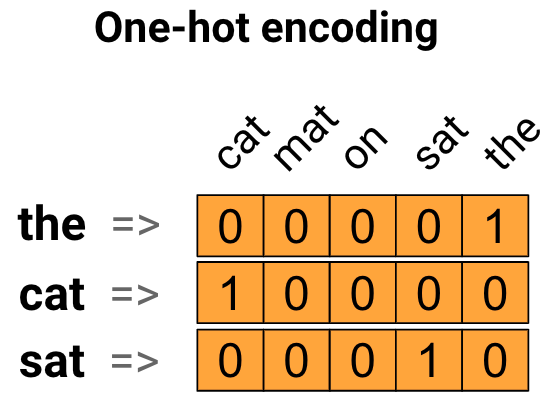

In [5]:
Image('ohe_sentence.png')

In [15]:
docs[0]

'Well done!'

<IPython.core.display.Javascript object>

In [16]:
docs[9]

'Could have done better.'

<IPython.core.display.Javascript object>

In [17]:
tokenizer.index_word

{1: 'work',
 2: 'done',
 3: 'good',
 4: 'effort',
 5: 'poor',
 6: 'well',
 7: 'great',
 8: 'nice',
 9: 'excellent',
 10: 'weak',
 11: 'not',
 12: 'could',
 13: 'have',
 14: 'better'}

<IPython.core.display.Javascript object>

In [18]:
tokenizer.sequences_to_texts(sequences)

['well done',
 'good work',
 'great effort',
 'nice work',
 'excellent',
 'weak',
 'poor effort',
 'not good',
 'poor work',
 'could have done']

<IPython.core.display.Javascript object>

In [19]:
tokenizer.word_index

{'work': 1,
 'done': 2,
 'good': 3,
 'effort': 4,
 'poor': 5,
 'well': 6,
 'great': 7,
 'nice': 8,
 'excellent': 9,
 'weak': 10,
 'not': 11,
 'could': 12,
 'have': 13,
 'better': 14}

<IPython.core.display.Javascript object>

## Embedding Layer

In [20]:
from tensorflow.keras.layers import Embedding

<IPython.core.display.Javascript object>

In [21]:
vocab_size

14

<IPython.core.display.Javascript object>

A questo punto è possibile costruire il modello.

In [23]:
model = Sequential()
model.add(Embedding(vocab_size + 1, 3, input_length=max_length))
####################
model.add(Flatten())
####################
model.add(Dense(1, activation="sigmoid"))

<IPython.core.display.Javascript object>

In [24]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

<IPython.core.display.Javascript object>

In [25]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4, 3)              45        
_________________________________________________________________
flatten (Flatten)            (None, 12)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 13        
Total params: 58
Trainable params: 58
Non-trainable params: 0
_________________________________________________________________
None


<IPython.core.display.Javascript object>

In [26]:
model.fit(padded_docs, labels, epochs=50, verbose=0)

<IPython.core.display.Javascript object>

In [27]:
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print("Accuracy: %0.2f" % (accuracy * 100))

Accuracy: 80.00


<IPython.core.display.Javascript object>

In [28]:
padded_docs.shape

(10, 4)

<IPython.core.display.Javascript object>

In [29]:
labels.shape

(10,)

<IPython.core.display.Javascript object>

In [30]:
model = Sequential()
model.add(Embedding(vocab_size + 1, 3, input_length=4))
###################
model.add(LSTM(32))
###################
model.add(Dense(1, activation="sigmoid"))

<IPython.core.display.Javascript object>

In [31]:
model.compile(optimizer="RMSprop", loss="binary_crossentropy", metrics=["accuracy"])

<IPython.core.display.Javascript object>

In [32]:
model.fit(padded_docs, labels, epochs=50, verbose=1)

Epoch 1/50
1/1 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.6000
Epoch 2/50
1/1 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5000
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5000
Epoch 4/50
1/1 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5000
Epoch 5/50
1/1 [==============================] - 0s 5ms/step - loss: 0.6920 - accuracy: 0.7000
Epoch 6/50
1/1 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.8000
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 0.6915 - accuracy: 0.8000
Epoch 8/50
1/1 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.8000
Epoch 9/50
1/1 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.8000
Epoch 10/50
1/1 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.8000
Epoch 11/50
1/1 [======================

<IPython.core.display.Javascript object>

In [34]:
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print("Accuracy: %0.2f" % (accuracy * 100))

Accuracy: 80.00


<IPython.core.display.Javascript object>

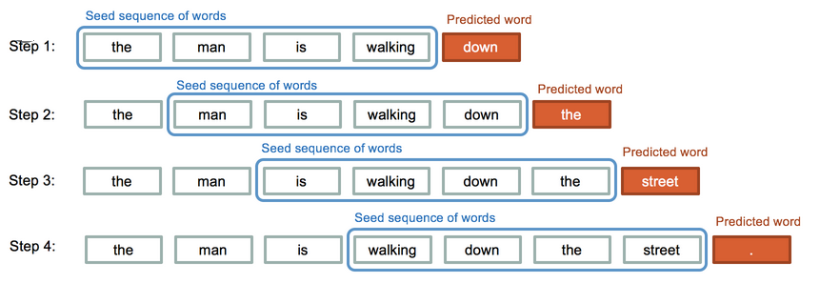

In [4]:
Image('Steps.png')

In [35]:
emb_layer = model.get_layer(index=0)

<IPython.core.display.Javascript object>

In [36]:
emb_layer.embeddings

<tf.Variable 'embedding_1/embeddings:0' shape=(15, 3) dtype=float32, numpy=
array([[-0.10345657,  0.05382458, -0.01016591],
       [ 0.12481567, -0.05475274, -0.05005527],
       [-0.08055142,  0.04225207,  0.12334871],
       [ 0.07955498, -0.08764515, -0.07183794],
       [ 0.04491528,  0.02738104,  0.0430331 ],
       [ 0.03574104, -0.10945469, -0.05144647],
       [ 0.0449192 , -0.01475031,  0.03149629],
       [-0.10167511,  0.12362801,  0.11913972],
       [-0.03824054, -0.01778362,  0.03384106],
       [-0.07612556,  0.04905426,  0.04222923],
       [-0.06233205, -0.07740726,  0.11584499],
       [-0.03379645,  0.01701106, -0.04533422],
       [ 0.10105402, -0.02861479, -0.13147798],
       [ 0.09775846, -0.0856251 , -0.09370044],
       [ 0.02009586, -0.02866395, -0.00753725]], dtype=float32)>

<IPython.core.display.Javascript object>

## Introduzione a GloVe

E' un algoritmo non supervisionato che serve per ottenere una rappresentazione vettoriale delle parole.
La rappresentazione vettoriale delle parole permette di inserire nello stesso claster (quindi vicine in termini spaziali) parole simili.

In [37]:
emb_index = {}

f = open("vectors.txt")

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.array(values[1:], dtype="float32")
    emb_index[word] = coefs

f.close()

<IPython.core.display.Javascript object>

In [38]:
emb_index["canzoni"]

array([-0.437588, -0.178281,  0.196754, -0.72333 , -0.242848, -0.823466,
        1.971678, -1.448099, -0.01397 ,  0.33087 ,  0.299212, -0.492974,
       -0.213971,  0.07388 , -0.42726 , -0.009939, -0.926076, -1.776456,
       -0.654872, -0.799978, -0.593785,  0.692702,  0.33668 , -1.135364,
        0.302004, -0.470208, -0.293373,  0.278944, -0.101084, -0.159286,
       -0.094266, -0.497085, -0.250011,  0.579891, -0.555999, -0.452293,
        0.474781, -0.868532,  1.069091, -0.251576, -0.462798, -0.017966,
       -1.142622,  0.506736,  0.177958, -0.085711,  0.036722,  0.131789,
        0.801601, -0.827719, -0.795915, -0.424202,  0.377726, -0.130817,
        0.675716, -0.369201,  0.388833,  0.60057 , -0.22404 , -0.355007,
       -0.253758,  0.639677, -0.090482, -0.692458, -0.514843,  0.307256,
       -0.476718, -0.572074, -1.10966 ,  0.297008,  0.194581, -0.712096,
        0.336273,  0.305365, -0.261069,  0.422752, -1.56182 ,  0.283716,
        1.277797,  0.709279,  0.832424, -0.863928, 

<IPython.core.display.Javascript object>

In [39]:
EMBEDDING_DIM = emb_index["canzoni"].shape[0]
EMBEDDING_DIM

100

<IPython.core.display.Javascript object>

In [40]:
vocab_size

14

<IPython.core.display.Javascript object>

In [41]:
embedding_matrix = np.zeros((vocab_size + 1, EMBEDDING_DIM))

<IPython.core.display.Javascript object>

In [42]:
for word, i in tokenizer.word_index.items():

    #     print(i, word)

    if word in emb_index.keys():
        emb_vector = emb_index[word]
        embedding_matrix[i] = emb_vector

<IPython.core.display.Javascript object>

In [43]:
embedding_matrix.shape

(15, 100)

<IPython.core.display.Javascript object>

In [44]:
embedding_matrix[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

<IPython.core.display.Javascript object>

In [45]:
embedding_matrix[1]

array([ 0.43266901, -0.133938  , -0.148881  , -0.87154698,  0.067236  ,
       -0.79340601,  0.82404101,  0.462524  , -0.23445401, -0.57740903,
        0.169147  ,  0.005278  ,  0.71912003,  0.40989399,  0.084621  ,
       -0.49858701, -0.015981  , -0.50948602, -0.190698  , -0.051989  ,
       -0.81760901,  0.073134  ,  0.255593  ,  0.037618  ,  0.265733  ,
       -0.37982401, -0.26966199, -0.225961  , -0.46519199, -0.53264898,
       -0.43456   , -0.48635101, -0.44110599,  0.29287601, -0.19318201,
       -0.425374  , -0.32649499, -0.609846  ,  0.62528402,  0.55567902,
       -0.79081601, -0.50456297, -0.281268  ,  0.81911403,  0.420075  ,
       -0.135721  , -0.362535  ,  0.051997  ,  0.40009099, -0.30543   ,
       -0.363379  , -0.354296  ,  0.35432699, -0.66807997,  1.01328003,
        0.23608799, -0.79198402,  0.388625  ,  0.052982  , -0.092802  ,
       -0.085803  , -0.078173  ,  0.52880102, -1.00618196,  0.216867  ,
        1.06780803, -0.055829  ,  0.59762502,  0.173407  , -0.88

<IPython.core.display.Javascript object>

In [47]:
model = Sequential()
model.add(
    Embedding(
        vocab_size + 1, 100, input_length=4, weights=[embedding_matrix], trainable=False
    )
)
###################
model.add(LSTM(32))
###################
model.add(Dense(1, activation="sigmoid"))

<IPython.core.display.Javascript object>

In [48]:
model.compile(optimizer="RMSprop", loss="binary_crossentropy", metrics=["accuracy"])

<IPython.core.display.Javascript object>

In [49]:
model.fit(padded_docs, labels, epochs=50, verbose=1)

Epoch 1/50
1/1 [==============================] - 0s 1ms/step - loss: 0.6822 - accuracy: 0.4000
Epoch 2/50
1/1 [==============================] - 0s 2ms/step - loss: 0.6600 - accuracy: 0.6000
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 0.6454 - accuracy: 0.7000
Epoch 4/50
1/1 [==============================] - 0s 2ms/step - loss: 0.6327 - accuracy: 0.7000
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 0.6207 - accuracy: 0.7000
Epoch 6/50
1/1 [==============================] - 0s 4ms/step - loss: 0.6090 - accuracy: 0.7000
Epoch 7/50
1/1 [==============================] - 0s 5ms/step - loss: 0.5972 - accuracy: 0.7000
Epoch 8/50
1/1 [==============================] - 0s 4ms/step - loss: 0.5852 - accuracy: 0.7000
Epoch 9/50
1/1 [==============================] - 0s 4ms/step - loss: 0.5729 - accuracy: 0.7000
Epoch 10/50
1/1 [==============================] - 0s 3ms/step - loss: 0.5602 - accuracy: 0.7000
Epoch 11/50
1/1 [======================

<IPython.core.display.Javascript object>

In [50]:
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print("Accuracy: %0.2f" % (accuracy * 100))

Accuracy: 100.00


<IPython.core.display.Javascript object>